In [3]:
import pandas as pd

sensor_data = "../all respondents data/004_15e51aba-9426-4f18-a1b0-1b769c8fa890.csv"
cognitive_phase_data = "Resp 4 cognitive task.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)



,Time Started,Cognitive Task,Screens
0,0:00:15,Task Understanding,Supporting Material
1,0:02:00,NaN,NaN
2,0:02:27,Focus,Map
3,0:03:17,Set Goal,NaN
4,0:03:30,Test Hypothesis,Filter


In [4]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


    Time Started       Cognitive Task              Screens
0        15000.0   Task Understanding  Supporting Material
1       120000.0                  NaN                  NaN
2       147000.0                Focus                  Map
3       197000.0             Set Goal                  NaN
4       210000.0      Test Hypothesis               Filter
5       280000.0      Create Artifact          Save Filter
6       296000.0        Asses Results         Filtered Map
7       304000.0        Asses Results           Statistics
8       375000.0       Interpert Data           Statistics
9       390000.0              Explore  Supporting Material
10      410000.0          Refine Goal           Statistics
11      419000.0        Asses Results           Statistics
12      430000.0          Refine Goal           Statistics
13      433000.0      Test Hypothesis               Filter
14      481000.0        Asses Results           Statistics
15      488000.0        Asses Results         Filtered M

In [5]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
0,36179.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task Understanding,Supporting Material
1,36187.0,0.127228,0.195328,0.024062,0.127094,0.024151,0.127213,0.055284,0.328766,0.0,0.036436,0.030664,Task Understanding,Supporting Material
2,36238.0,0.127266,0.196504,0.024063,0.127147,0.024131,0.127242,0.055287,0.328766,0.0,0.018703,0.037446,Task Understanding,Supporting Material
3,36271.0,0.128054,0.196801,0.024080,0.127713,0.024133,0.128115,0.055289,0.328766,0.0,0.020394,0.142510,Task Understanding,Supporting Material
4,36302.0,0.128570,0.196771,0.024089,0.128075,0.024132,0.128631,0.055292,0.328766,0.0,0.030945,0.116325,Task Understanding,Supporting Material


In [6]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset=['Contempt'])

# Check if a categorical value exists in the DataFrame
if final_df['Cognitive Task'].isin(['Explore']).any():
    print('The categorical value exists in the DataFrame')
else:
    print('The categorical value does not exist in the DataFrame')

final_df.to_csv('004_15e51aba_emotions_with_cognitive_task_and_screen_new.csv', index=False)
final_df.tail()

The categorical value exists in the DataFrame


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
35549,1227198.0,0.145297,0.194136,0.025544,0.130612,0.024127,0.132668,0.056346,0.328766,0.0,0.049710,0.009564,NaN,NaN
35550,1227229.0,0.143495,0.193999,0.025609,0.130265,0.024121,0.132844,0.056207,0.328766,0.0,0.045693,0.008979,NaN,NaN
35551,1227261.0,0.137619,0.194267,0.025691,0.128740,0.024121,0.133345,0.055670,0.328766,0.0,0.045747,0.010507,NaN,NaN
35552,1227292.0,0.137332,0.194697,0.025987,0.128051,0.024124,0.134636,0.055471,0.328766,0.0,0.048527,0.012095,NaN,NaN
35553,1227325.0,0.137844,0.195259,0.026389,0.127715,0.024127,0.136879,0.055379,0.328766,0.0,0.051098,0.017823,NaN,NaN


In [7]:
display(final_df.sample(15))

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
2970,135660.0,0.314385,0.608367,0.545439,0.164892,0.024971,0.933329,0.055364,63.795971,-10.362419,0.383381,0.129949,NaN,NaN
23408,820444.0,0.183689,0.206297,0.030287,0.156872,0.024283,0.126810,0.060251,0.328766,0.000000,0.084047,0.009637,Conclude,NaN
30224,1048795.0,1.345313,0.193807,0.686898,0.936437,0.024088,0.128013,0.316510,63.196350,0.000000,0.008300,0.166073,Interpert Data,NaN
21174,745595.0,2.078426,0.194689,0.326162,0.616725,0.024521,0.130858,0.060355,23.153599,-0.276489,0.171612,0.505009,Generate Hypothesis,Statistics
8555,322843.0,1.391692,0.200552,0.663243,0.947916,0.024114,0.135198,0.056686,64.043083,0.000000,0.000444,0.595874,Asses Results,Statistics
5756,229069.0,1.419172,0.193647,0.755478,0.925358,0.024438,0.126563,0.080016,63.910137,0.000000,0.005419,0.120590,Test Hypothesis,Filter
31320,1085516.0,1.331291,0.192764,0.685634,0.935751,0.024115,0.127388,0.617853,63.206417,0.000000,0.006111,0.081329,Conclude,NaN
17687,628783.0,0.129772,0.226194,0.024795,0.129441,0.024576,0.127000,0.055458,19.513317,0.000000,0.143454,0.081380,Test Hypothesis,Filter
30762,1066813.0,0.314442,0.193228,0.081799,0.279557,0.024044,0.127885,0.058443,1.088603,0.000000,0.006977,0.038203,Interpert Data,NaN
34758,1200699.0,1.650022,0.193702,1.048280,0.936415,0.024104,0.128168,0.971782,63.580120,0.000000,0.006761,0.273784,NaN,NaN


In [8]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion
count,3.555300e+04,35553.000000,35553.000000,35553.000000,35553.000000,35553.000000,35553.000000,35553.000000,35553.000000,35553.000000,35553.000000,35553.000000
mean,6.317859e+05,1.167202,2.291591,0.700451,0.778502,3.816016,0.357797,0.300803,44.036497,2.404928,1.253082,0.300230
std,3.438577e+05,1.986520,12.053227,3.242789,3.239521,18.455189,3.118277,2.945516,29.174419,18.834669,8.008896,1.268897
min,3.618700e+04,0.006930,0.000009,0.001307,0.003836,0.024032,0.000942,0.055279,0.328766,-66.017479,0.000153,0.000617
25%,3.340280e+05,0.318818,0.193131,0.046744,0.191117,0.024092,0.127176,0.055894,8.696287,0.000000,0.005005,0.042140
50%,6.317880e+05,1.129593,0.194867,0.543098,0.757069,0.024231,0.127975,0.059676,59.303631,0.000000,0.015741,0.115775
75%,9.295640e+05,1.342805,0.203818,0.670653,0.929532,0.025115,0.130376,0.084843,63.523029,0.000000,0.099299,0.296650
max,1.227325e+06,55.899818,98.121033,87.468544,91.223236,99.979660,82.758331,95.164307,99.981064,99.967102,99.858139,90.648895


In [9]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

         Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0         Asses Results  1.223289  0.195293  0.591220  0.853344  0.024198   
1              Conclude  1.142866  0.193723  0.538517  0.508090  0.026544   
2       Create Artifact  1.307420  0.197669  0.657311  0.929266  0.024232   
3               Explore  1.109654  0.195592  0.523343  0.770349  0.024263   
4                 Focus  1.199391  0.194473  0.538070  0.829443  0.024101   
5   Generate Hypothesis  1.304281  0.194857  0.647683  0.914991  0.024159   
6        Interpert Data  0.821496  0.195572  0.321749  0.607483  0.024088   
7           Refine Goal  1.215395  0.194256  0.599722  0.842936  0.024360   
8              Set Goal  1.261054  0.193604  0.636160  0.904074  0.024075   
9    Task Understanding  0.405627  0.194695  0.126136  0.291074  0.024127   
10      Test Hypothesis  1.211890  0.194606  0.598894  0.847063  0.024287   

     Sadness  Surprise  Engagement  Sentimentality  Confusion  
0   0.12830

,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Asses Results,1.223289,0.195293,0.591220,0.853344,0.024198,0.128308,0.061395,58.588291,0.012431,0.151044
1,Conclude,1.142866,0.193723,0.538517,0.508090,0.026544,0.127288,0.070192,63.541115,0.047960,0.140602
2,Create Artifact,1.307420,0.197669,0.657311,0.929266,0.024232,0.128727,0.066082,62.352776,0.013347,0.229263
3,Explore,1.109654,0.195592,0.523343,0.770349,0.024263,0.127877,0.059378,55.288580,0.014755,0.122662
4,Focus,1.199391,0.194473,0.538070,0.829443,0.024101,0.127962,0.058835,55.602592,0.007199,0.072909


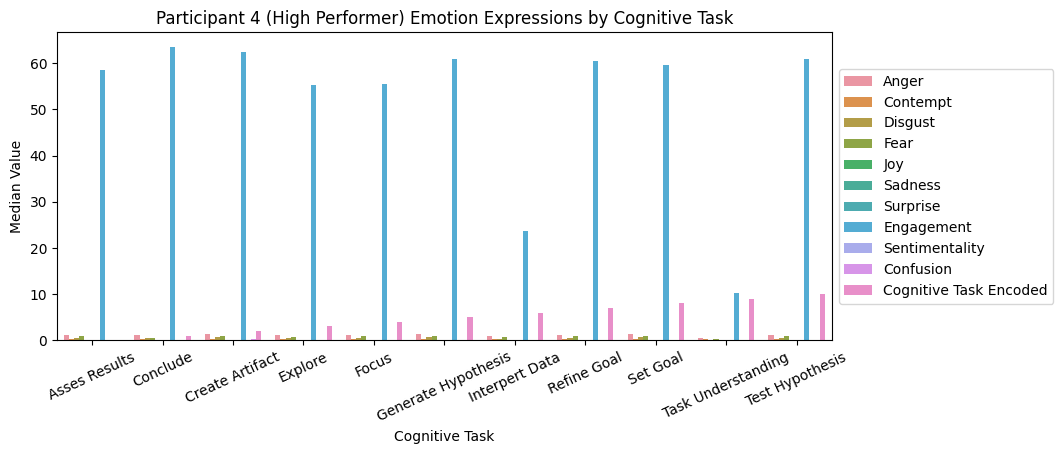

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# medians_to_plot = medians.drop(['Engagement', 'Cognitive Task Encoded'], axis=1)

# Melt the dataframe to convert emotions into a column
melted_df = medians.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Median Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Median Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Participant 4 (High Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Median Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


<h3>Mean</h3>

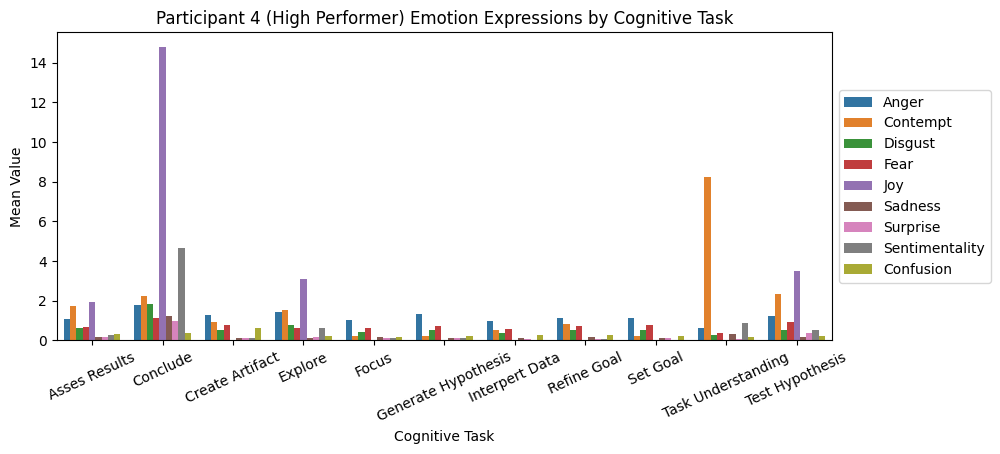

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create means df
means = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).mean()
# Reset index and add 'Cognitive Task' as a column
means = means.reset_index()
means['Cognitive Task'] = means['Cognitive Task']

# Melt the dataframe to convert emotions into a column
melted_df = means.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Mean Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Mean Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Participant 4 (High Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Mean Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

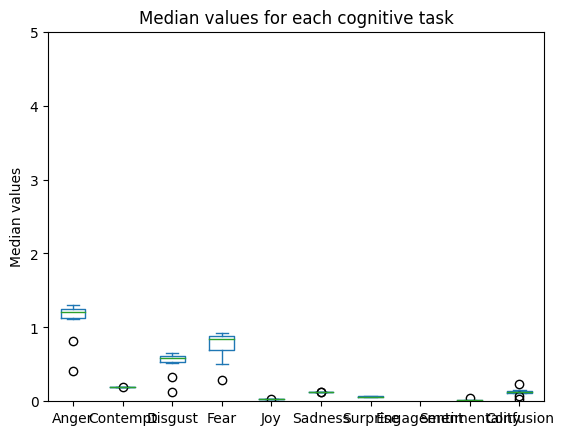

In [12]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

In [13]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])



Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion'],
      dtype='object')


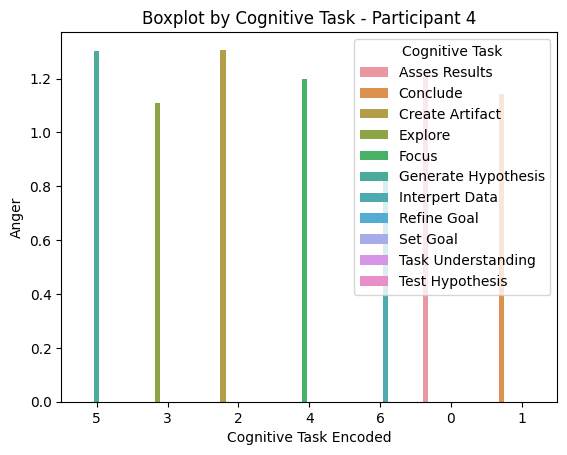

In [14]:
import matplotlib.pyplot as plt

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Participant 4")

# Display the plot
plt.show()


In [15]:
# Create medians df
general_medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].median()
general_medians.head(20)


Anger              1.129593
Contempt           0.194867
Disgust            0.543098
Fear               0.757069
Joy                0.024231
Sadness            0.127975
Surprise           0.059676
Engagement        59.303631
Sentimentality     0.015741
Confusion          0.115775
dtype: float64

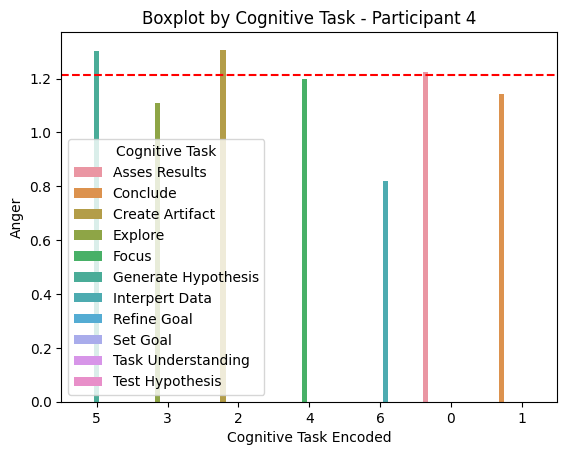

In [16]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Participant 4")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Get the original string labels from the LabelEncoder
le = LabelEncoder()
le.fit(medians['Cognitive Task'])
labels = le.inverse_transform([5,3,2,4,6,0,1])  


# Display the plot
plt.show()


Wrong Lables below!!!

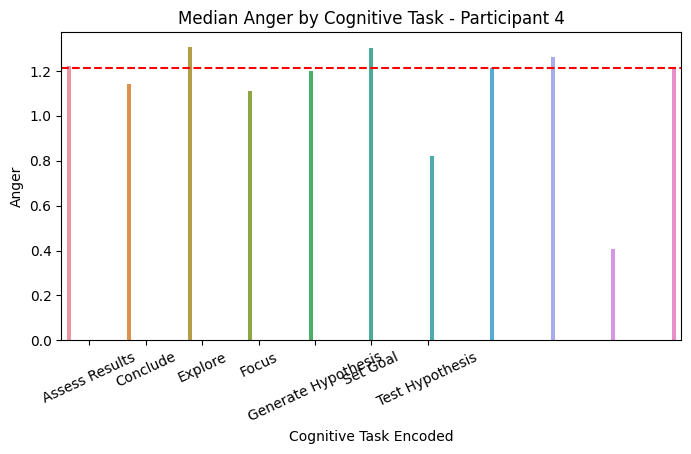

In [17]:
import matplotlib.pyplot as plt

# Define a dictionary to map encoded labels to their corresponding original labels
label_map = {0: 'Assess Results', 1: 'Conclude', 2: 'Explore', 3: 'Focus', 4: 'Generate Hypothesis', 5: 'Set Goal', 6: 'Test Hypothesis'}

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(8,4))

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task')

# Add the title
plt.title("Median Anger by Cognitive Task - Participant 4")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Define the desired order of the labels as a list
ordered_labels = [label_map[i] for i in [0,1,2,3,4,5,6]] # [5,3,2,4,6,0,1]]

# Set the x-axis tick labels using the ordered_labels list
plt.xticks(range(len(label_map)), ordered_labels, rotation=25, fontsize=10)

plt.legend().remove()
# Display the plot
plt.show()


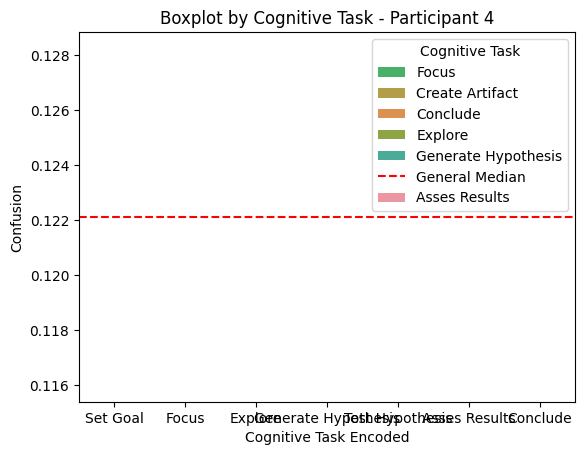

In [18]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Confusion'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Confusion', data=medians, hue='Cognitive Task', order=['Set Goal','Focus', 'Explore', 'Generate Hypothesis', 'Test Hypothesis', 'Asses Results', 'Conclude'])

# Add the title
plt.title("Boxplot by Cognitive Task - Participant 4")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Reorder the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,3,2,4,6,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Cognitive Task')

# Display the plot
plt.show()


In [19]:
cognitive_df = final_df['Cognitive Task']
cognitive_df.replace('nan', pd.NA, inplace=True)

cognitive_df.dropna
cognitive_df.head

<bound method NDFrame.head of 1        Task Understanding
2        Task Understanding
3        Task Understanding
4        Task Understanding
5        Task Understanding
                ...        
35549                   NaN
35550                   NaN
35551                   NaN
35552                   NaN
35553                   NaN
Name: Cognitive Task, Length: 35553, dtype: object>

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# df_phases = pd.read_csv(cognitive_phase_data)
df_phases = pd.DataFrame(final_df['Cognitive Task'], columns=['Cognitive Task'])

# Convert the Cognitive Task column to a string type
df_phases['Cognitive Task'] = df_phases['Cognitive Task'].astype(str)

df_phases.replace('nan', pd.NA, inplace=True)
# df_phases['Cognitive Task'] = df_phases['Cognitive Task'].replace("<NA>", float('nan'))


# df_cleaned = df_phases.dropna()

df_cleaned = df_phases.dropna(subset=['Cognitive Task'], how='any').copy()



df_cleaned.head()




,Cognitive Task
1,Task Understanding
2,Task Understanding
3,Task Understanding
4,Task Understanding
5,Task Understanding


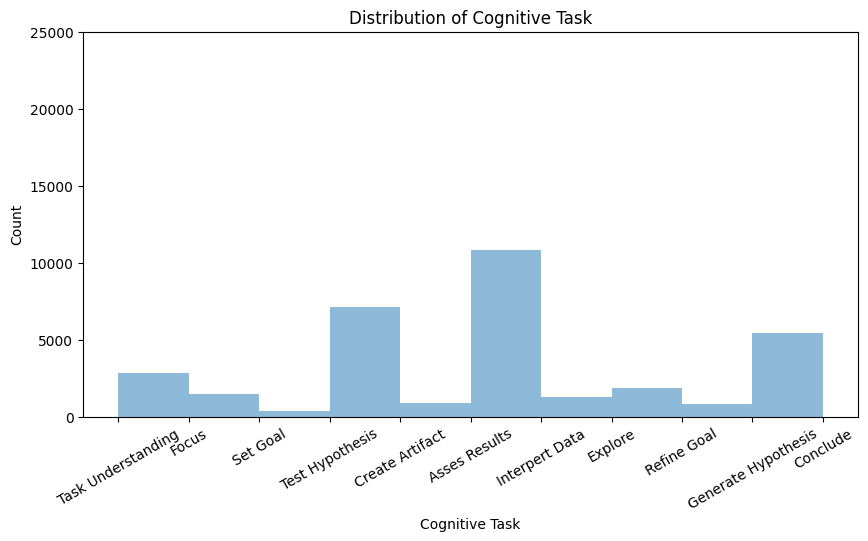

In [21]:
# Create a wider figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a histogram of the Cognitive Task column
plt.hist(df_cleaned['Cognitive Task'], alpha=0.5)
plt.ylim(0, 25000) 

# Add labels and title
plt.xlabel('Cognitive Task')
plt.ylabel('Count')
plt.title('Distribution of Cognitive Task')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=30)
# Show the plot
plt.show()